In [1]:
TARGET_LATITUDE = 18.6011
TARGET_LONGITUDE = 73.7641
TARGET = 'Pune'
print('The geograpical coordinates of {} are {}, {}.'.format(TARGET, TARGET_LATITUDE, TARGET_LONGITUDE))

The geograpical coordinates of Pune are 18.6011, 73.7641.


## Exploring venues in Pune, India

Table of Contents  
Introduction  
Data Collection from APIs  
Data Cleaning  
Methodolgy  
Analysis  
Results and Discussion  
Conclusion  

## Introduction

The aim of the project is to identify venues in Pune, India based on their rating and average prices. In this notebook, we will identify various venues in the city of Pune, India, using Foursquare API and Zomato API, to help visitors select the restaurants that suit them the best.  

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.  

Here, we'll identify places that are fit for various individuals based on the information collected from the two APIs and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.  

## Data Collection from APIs

To begin with, we will take a look at Pune on the Map using the folium library.  

We will also fetch the data from two different APIs.  

## Foursquare API:  
We will use the Foursquare API to fetch venues in Pune starting from the middle upto 44 Kilometers in each direction.

## Zomato API:  
The Zomato API provides information about various venues including the complete address, user ratings, price for two people, price range and a lot more.

## Pune  
Pune is composed of a number of sectors spread across a total area of 150 sq Km. There are many venues (especially restaurants, hotels and cafes) which can be explored.  

We can use the geopy library to extract the latitude and longitude values of Pune but it seems off and thus, we'll directly supply the values in this case.  

In [6]:
import folium

target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)
folium.Marker([TARGET_LATITUDE, TARGET_LONGITUDE]).add_to(target_location_map)
target_location_map.save("TargetMap.html")
target_location_map

In [7]:
FOURSQUARE_CLIENT_ID = 'FQS1T4KPMXUBHNTGJQBZXOGL3KEC2NNXAZKYORSQSKM3RLQR'
FOURSQUARE_CLIENT_SECRET = 'LGM03PQMINWLA0LTMPHMWFVKSASX4ICLC5BN3F50CMVOQRDB'
RADIUS = 4000 # 4 Km
NO_OF_VENUES = 100
VERSION = '20200507' # Current date

## Four Square API

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        TARGET_LATITUDE, 
                                                                        TARGET_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 83 venues fetched within a total radius of 4.0 Km

Total 83 venues fetched


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [10]:
headers = {'user-key': 'df1145140716bb75945b27ee861a1c62'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    try:
        result = requests.get(url, headers = headers).json()
    except:
        print("There was an error...")
    try:
        
        if (len(result['restaurants']) > 0):
            venue.append(result['restaurants'][0]['restaurant']['name'])
            venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
            venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
            venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
            venue.append(result['restaurants'][0]['restaurant']['price_range'])
            venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
            venue.append(result['restaurants'][0]['restaurant']['location']['address'])
            venues_information.append(venue)
        else:
            venues_information.append(np.zeros(6))
    except:
        pass
        
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [ ]:
import pandas as pd
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

## Zomato API

### Data Cleaning 

In [ ]:
target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(target_location_map)  

target_location_map.save("Venues by Foursquare.html")
target_location_map

In [14]:
target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    UPDATED_LG = float(longitude)
    UPDATED_LT = float(latitude)
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [UPDATED_LT, UPDATED_LG],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(target_location_map)  

target_location_map.save("Venues by Zomato.html")
target_location_map

In [15]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [16]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [17]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Natural Ice Cream,Ice Cream Shop,18.5912,73.7524,Natural Ice Cream,18.5912,73.7525,150.0,1.0,4.2,"Survey 47/1A, Hinjewadi-Wakad Road, Hinjawadi,...",0.0000,0.0001
1,Shaolin- The Chinese Cuisine,Chinese Restaurant,18.5883,73.7835,Hotel Akshat,18.5882,73.7835,600.0,2.0,2.5,"Near Jagtap Dairy Chowk, Vishal Nagar, Wakad, ...",-0.0001,0.0000
2,18 Degrees,Lounge,18.5935,73.7859,Scoopy Smile,18.5935,73.7859,300.0,1.0,0,"Spot 18, Fourth Floor, Pimple Saudagar, Pune",0.0000,0.0000
3,Urban Foundry,Lounge,18.5693,73.7747,The Urban Foundry,18.5692,73.7747,1600.0,3.0,4.6,"Shop 1, Balewadi High Street, Cummins India Of...",-0.0001,0.0000
4,Incognito,Italian Restaurant,18.5704,73.7746,"Incognito - Restaurant, Bar & Cafe",18.5703,73.7747,1500.0,3.0,4.3,"Balewadi High Street, Panchshil Business Park,...",-0.0001,0.0001
5,Portico - Sayaji,Indian Restaurant,18.5993,73.7549,Turque - Sayaji Hotel,18.5989,73.7553,1700.0,3.0,4.6,"Sayaji Hotel, Survey 135/136, Mumbai-Bangalore...",-0.0004,0.0004
6,Terttulia,Bistro,18.5693,73.7747,Terttulia Bistro,18.5693,73.7747,1700.0,3.0,4.0,"Shop 2, Balewadi High Street, Panchshil Busine...",0.0000,0.0000
7,Playboy Beer Garden,Brewery,18.5705,73.7739,La Pizzeria,18.5704,73.7742,1400.0,3.0,4.1,"Shop F/B21, Ground Floor, Balewadi High Street...",-0.0001,0.0003
8,Way Down South,South Indian Restaurant,18.5664,73.7707,Way Down South,18.5665,73.7708,500.0,2.0,4.0,"Sai Krupa Apartments, Baner Road, Baner, Pune",0.0001,0.0001
9,Mezza 9,Mexican Restaurant,18.5941,73.7346,Mezza 9,18.5943,73.7345,1700.0,3.0,3.9,"Survey 152, IT Park, Phase 1, Opposite KPIT Cu...",0.0002,-0.0001


In [18]:
selected_venues = selected_venues.drop([0]).reset_index(drop = True)

Taking a look at the names of venues from both APIs, some names are a complete mismatch.  

Category 1: There are venues that have specific restaurants/cafes inside them as provided by Zomato API (Pizza Hut in Elante Mall).  

Category 2: Two locations are so close by that they have practically same latitude and longitude values (The Pizza Kitchen and Zara).  

Category 3: Some have been replaced with new restaurants (Uderdoggs has now been replaced by The Brew Estate).  

The venues which belong to category 1 and category 3 are alright to keep, the venues that fall in category 2 should be removed.  

In [19]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [20]:
selected_venues.head(5)

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Chinese Restaurant,Hotel Akshat,18.5882,73.7835,2.0,2.5,"Near Jagtap Dairy Chowk, Vishal Nagar, Wakad, ...",300.0
1,Lounge,Scoopy Smile,18.5935,73.7859,1.0,0,"Spot 18, Fourth Floor, Pimple Saudagar, Pune",150.0
2,Lounge,The Urban Foundry,18.5692,73.7747,3.0,4.6,"Shop 1, Balewadi High Street, Cummins India Of...",800.0
3,Italian Restaurant,"Incognito - Restaurant, Bar & Cafe",18.5703,73.7747,3.0,4.3,"Balewadi High Street, Panchshil Business Park,...",750.0
4,Indian Restaurant,Turque - Sayaji Hotel,18.5989,73.7553,3.0,4.6,"Sayaji Hotel, Survey 135/136, Mumbai-Bangalore...",850.0


In [21]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 34


## Methodology 
This project aims at identifying the venues in Pune based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.  

As a first step, we retrieved the data from two APIs (Foursquare and Zomato). We extract venue information from the center of Pune, upto a distance of 4 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.  

Secondly, we then explored the data retrieved from the two APIs on the map and identified the top category types. The data from the two sources is carefully combined based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.  

Next, we'll analyse the data that we created based on the ratings and price of each venue. We'll identify places where many venues are located so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore areas that are high rated and those that are low rated while also plotting the map of high and low priced venues. Lastly, we'll cluster the venues based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.  

Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.  

## Analysis   
The complete dataset is now in its final form.  

We will inspect these venues based on their rating. The rating of a venue are based on user reviews and belongs to a range from 1 to 5. We'll also analyse the venues based on their price per person as well as the price range.  

## Categories  
We have various types of venues in the final dataset. We will take a look at the venues and check which are the majority venue categories in the list.  

<BarContainer object of 22 artists>

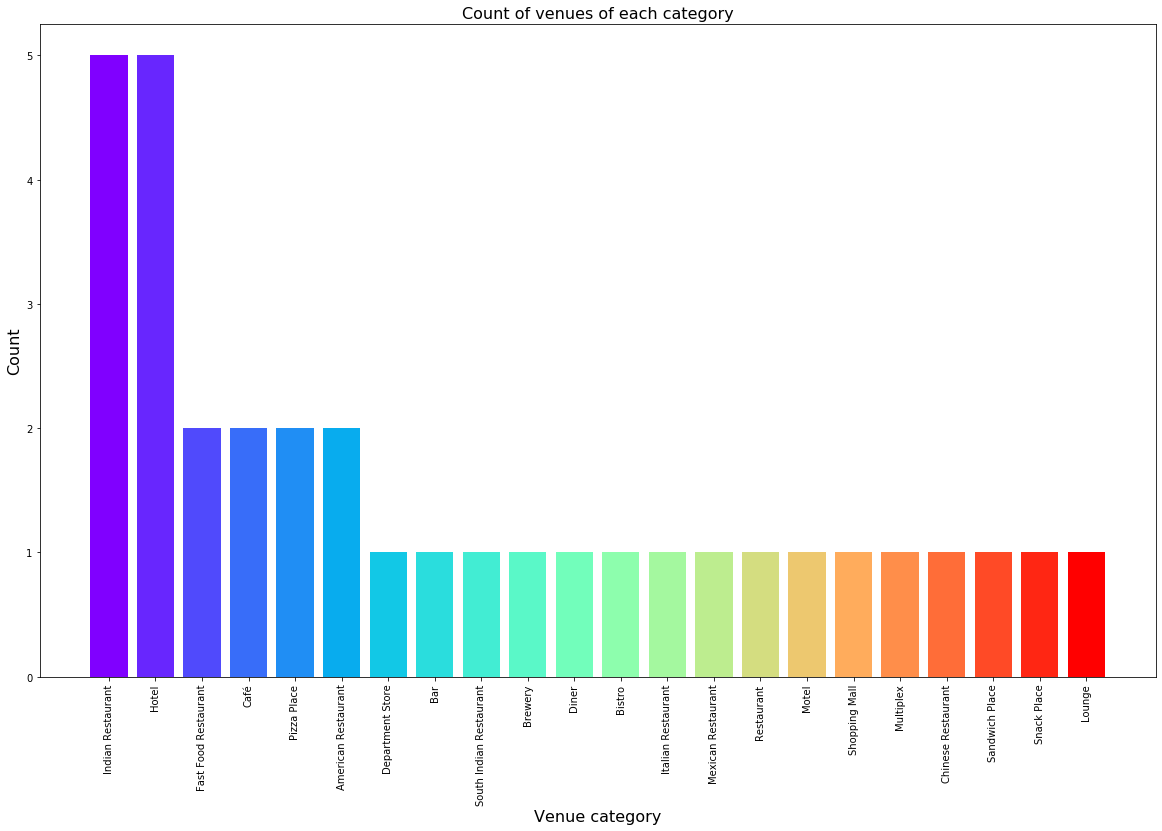

In [22]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

As we can see the majority venues are Hotel and Indian Restaurant. So, if as a tourist, you're looking for cafes and Indian restaurants, you're in luck.  

## Rating  
Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place. To cater to this, we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.  

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.

Text(0.5, 1.0, 'Count of venues with given rating')

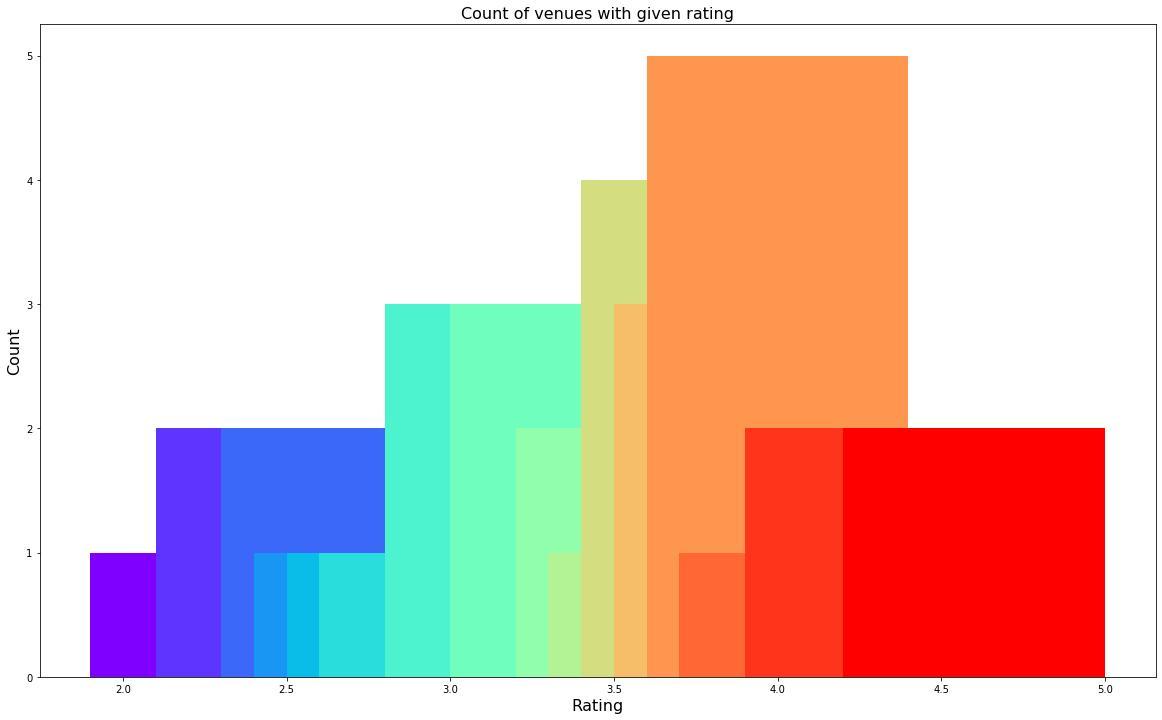

In [23]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that majority venues have their rating close to 4.  

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:  

1 to 2  
2 to 3  
3 to 4  
4 to 5  

In [24]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

### Now, we will plot the venues on the map.

In [25]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(target_location_map)  

target_location_map.save("Venues Ratings.html")
target_location_map

The map has the location of all the venues. It appears that many venues are located near about Hinjewadi, Baner and Balewadi High Street with rating above 3. If someone wants to explore new venues, they should definitely check out these areas.  

## Price

We will now take a look the venues based on the price values. We have two price features for our venues, one is average_price which defines the average cost for one person and the other is price_range which determines the price range as defined by Zomato.  

We will first explore the average_price using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.  

Text(0.5, 1.0, 'Count of venues with given average price')

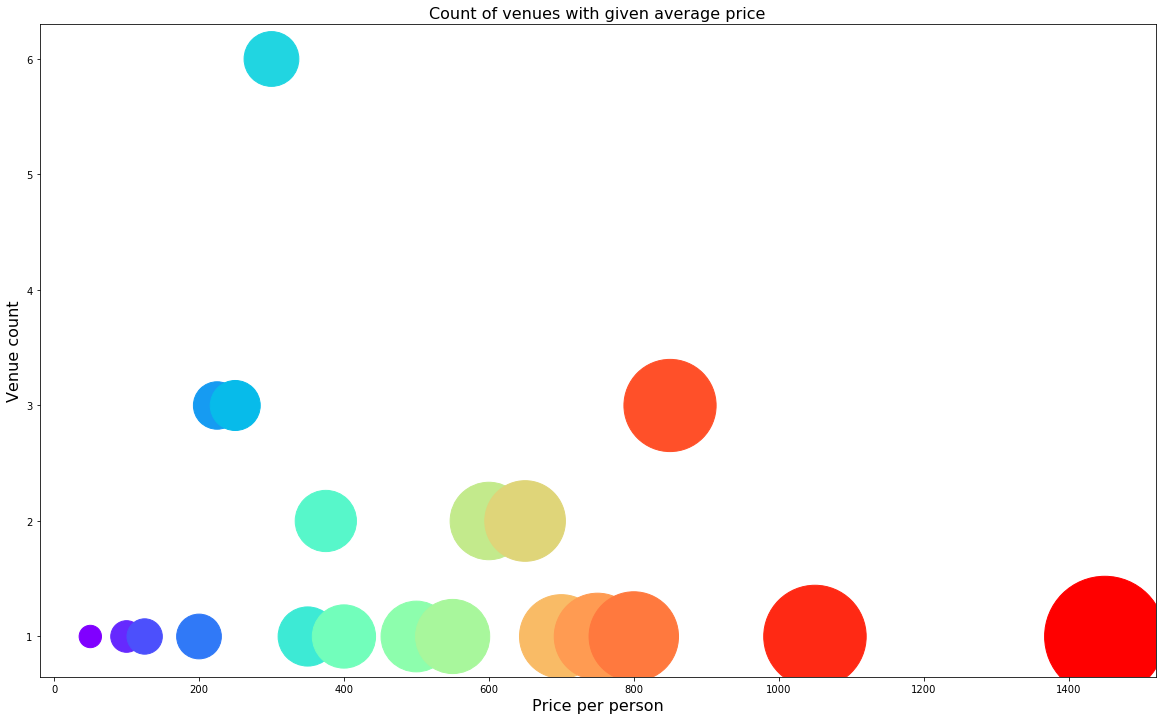

In [30]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

From the plot above we can see that a large number of venues have an average price between Rs 400 and Rs 700.  

Users might also be interested in going to a place that fits in their budget. I'll use the price_range column to plot the venues on a map. We'll represent the venues with lower price in green and move towards red as the price increases.  

# Clustering

We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into two separate groups.

In [32]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Chinese Restaurant,Hotel Akshat,18.5882,73.7835,2.0,2.5,"Near Jagtap Dairy Chowk, Vishal Nagar, Wakad, ...",300.0,Okay
2,0,Lounge,The Urban Foundry,18.5692,73.7747,3.0,4.6,"Shop 1, Balewadi High Street, Cummins India Of...",800.0,Very good
3,0,Italian Restaurant,"Incognito - Restaurant, Bar & Cafe",18.5703,73.7747,3.0,4.3,"Balewadi High Street, Panchshil Business Park,...",750.0,Very good
4,0,Indian Restaurant,Turque - Sayaji Hotel,18.5989,73.7553,3.0,4.6,"Sayaji Hotel, Survey 135/136, Mumbai-Bangalore...",850.0,Very good
5,0,Bistro,Terttulia Bistro,18.5693,73.7747,3.0,4.0,"Shop 2, Balewadi High Street, Panchshil Busine...",850.0,Good


In [34]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Lounge,The Urban Foundry,18.5692,73.7747,3.0,4.6,"Shop 1, Balewadi High Street, Cummins India Of...",800.0,Very good
1,0,Italian Restaurant,"Incognito - Restaurant, Bar & Cafe",18.5703,73.7747,3.0,4.3,"Balewadi High Street, Panchshil Business Park,...",750.0,Very good
2,0,Indian Restaurant,Turque - Sayaji Hotel,18.5989,73.7553,3.0,4.6,"Sayaji Hotel, Survey 135/136, Mumbai-Bangalore...",850.0,Very good
3,0,Bistro,Terttulia Bistro,18.5693,73.7747,3.0,4.0,"Shop 2, Balewadi High Street, Panchshil Busine...",850.0,Good
4,0,Brewery,La Pizzeria,18.5704,73.7742,3.0,4.1,"Shop F/B21, Ground Floor, Balewadi High Street...",700.0,Very good
5,0,Mexican Restaurant,Mezza 9,18.5943,73.7345,3.0,3.9,"Survey 152, IT Park, Phase 1, Opposite KPIT Cu...",850.0,Good
6,0,Indian Restaurant,Nawab Asia,18.5695,73.7746,3.0,4.0,"Unit 5/6/7/8, Groundfloor, Cummin India Office...",650.0,Good
7,0,Hotel,Slounge - Lemon Tree Hotel,18.5857,73.7343,3.0,3.2,"100-101, Sakore Nagar, Viman Nagar, Pune",650.0,Good
8,0,Bar,Apache High Street,18.5694,73.7746,3.0,4.3,"Shop 3, Balewadi High Street, Panchshil Busine...",550.0,Very good
9,0,Indian Restaurant,Saundarya Garden,18.5911,73.7517,3.0,3.6,"Hinjewadi Road, Near Infotech Park, Hinjawadi,...",600.0,Good


In [35]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 3.15 and rating spread around 3.97


In [36]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Chinese Restaurant,Hotel Akshat,18.5882,73.7835,2.0,2.5,"Near Jagtap Dairy Chowk, Vishal Nagar, Wakad, ...",300.0,Okay
1,1,South Indian Restaurant,Way Down South,18.5665,73.7708,2.0,4.0,"Sai Krupa Apartments, Baner Road, Baner, Pune",250.0,Good
2,1,Snack Place,Arihant Hotel,18.6268,73.7826,2.0,3.9,"Shop 1, Kamala Corner Building, Ambedkar Chowk...",250.0,Good
3,1,Hotel,Orchid Multi-Cuisine Restaurant - Fortune Inn ...,18.5911,73.7481,3.0,3.4,"ITC Fortune Inn Exotica, Rajiv Gandhi IT Park,...",500.0,Good
4,1,American Restaurant,Apple 5,18.5882,73.7819,2.0,3.9,"Shop 2, Sankalp Apartment, Jagtap Dairy, Wakad...",300.0,Good
5,1,Fast Food Restaurant,Nevale Misal,18.6280,73.7808,1.0,4.0,"CTS 704, Ward 1, Gandhi Peth, Opposite Masjid,...",100.0,Good
6,1,Department Store,KGN Xprs,18.5910,73.7444,1.0,4.0,"34, Wakad Road, Opposite D-Mart, Hinjawadi, Pune",225.0,Good
7,1,Pizza Place,Domino's Pizza,18.5958,73.7882,1.0,3.2,"Shop 18 - 20, Rainbow Plaza, Near Shivar Garde...",200.0,Good
8,1,Café,Cafe Coffee Day,18.6041,73.7533,2.0,2.5,"Shop 107, Zen Business Center, Mumbai - Bangal...",300.0,Okay
9,1,Hotel,Namah - Hotel Ambience Excellency,18.6002,73.7755,2.0,3.8,"Hotel Ambience Excellency, 208/3/2 Kalewadi Ch...",400.0,Good


In [37]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 1.71 and rating spread around 3.30


## Results and Discussion   

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Pune, India.  

After collecting data from the Foursquare and Zomato APIs, we got a list of 120 different venues. However, not all venues from the two APIs were identical. Hence, we had to inspect their latitude and longitude values as well as names to combine them and remove all the outliers. This resulted in a total venue count of 49.  

We identified that from the total set of venues, majority of them were Cafes and Indian Restaurants. A visitor who loves Cafes/Indian Restaurants would surely benefit from coming to Pune.  

While the complete range of ratings range from 1 to 5, the majority venues have ratings close to 4. This means that most restaurants provide good quality food which is liked by the people of the city, thus indicating the high rating. When we plot these venues on the map, we discover that there are clusters of venues around Hinjewadi, Balewadi High Street and Baner. These clusters also have very high ratings (more than 3).  

When we take a look at the price values of each venue, we explore that many venues have prices which are in the range of Rs 400 to Rs 700 for one person. However, the variation in prices is very large, given the complete range starts from Rs 100 and goes uptil Rs 1200. On plotting the venues based on their price range on the map, we discovered that venues located near Hinjewadi and Baner are relatively priced lower than venues in Balewadi High Street.  

Finally, through clusters we identified that there are many venues which are relatively lower priced but have an average rating of 3.57. On the other hand, there are few venues which are high priced and have average rating of 4.03.  

If you're looking for cheap places with relatively high rating, you should check Hinjewadi.  
If you're looking for the best places, with the highest rating but might also carry a high price tag, you should visit Baner and Balewadi High Street.  
A company can use this information to build up an online website/mobile application, to provide users with up to date   information about various venues in the city based on the search criteria (name, rating and price).  

# Conclusion   

The purpose of this project was to explore the places that a person visiting Pune West could visit. The venues have been identified using Foursquare and Zomato API and have been plotted on the map. The map reveals that there are three major areas a person can visit: Hinjewadi, Baner & Balewadi High Street. Based on the visitor's venue rating and price requirements, he/she can choose amongst the three places.